In [1]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import seaborn as sns

##### *AreasVerdes*
Leemos la informacion usando la libreria geopandas para poder obtener nuestro geodataframe
Hacemos uso de head para poder ver la informacion que contiene nuestro archivo shape 

In [2]:
areas_verdes_shp = gpd.read_file('inventario_areas_verdes_1\inventario_areas_verdes_1.shp')#Se lee el archivo shapefile de las áreas verdes y se guarda en la variable areas_verdes_shp 

areas_verdes_shp.head()

c:\Users\lonje\OneDrive\Documentos\GitHub\qgis\.venv\Lib\site-packages\pyogrio\raw.py:196: RuntimeWarning: inventario_areas_verdes_1\inventario_areas_verdes_1.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


,nombre,categoria_,subcat_sed,geometry
0,0,Ãreas verdes complementarias o ligadas a la r...,"Veg. ArbÃ³rea, arbustiva y herbÃ¡cea de glorietas","POLYGON ((486775.686 2132200.037, 486775.319 2..."
1,0,Ãreas verdes urbanas fragmentadas,Terrenos baldÃ­os,"POLYGON ((485986.153 2130716.415, 485997.265 2..."
2,CAMELLON ANILLO PERIFERICO (Blvd. ADOLFO LOPEZ...,Ãreas verdes complementarias o ligadas a la r...,"Veg. ArbÃ³rea, arbustiva y herbÃ¡cea de glorietas","POLYGON ((486890.803 2132129.64, 486889.143 21..."
3,0,Equipamientos urbanos con vegetaciÃ³n,Instituciones acadÃ©micas pÃºblicas,"POLYGON ((486023.561 2131882.086, 486012.485 2..."
4,None,Ãreas verdes complementarias o ligadas a la r...,Camellones centrales y laterales,"POLYGON ((486550.648 2131520.367, 486558.816 2..."


##### *AreasVerdes*
Generamos los centros del poligono utilizando .geometry.centroid
Generamos tambien la latitude y longitude con .geometry.x and .geometry.y
*importante*: Eliminar la columna centroid ya que esta es de tipo geometria y el archivo shape solo soporta una columna tipo geometria
Exportamos el archivo para comprobar nuestros resultados en Qgis.

In [3]:
areas_verdes_shp['centroid'] = areas_verdes_shp.geometry.centroid#Se generan los centros de los polígonos
areas_verdes_shp['latitude'] = areas_verdes_shp.centroid.y#Se obtienen las coordenadas de los centros de los polígonos
areas_verdes_shp['longitude'] = areas_verdes_shp.centroid.x#Se obtienen las coordenadas de los centros de los polígonos
areas_verdes_shp.drop(columns=['centroid'], inplace=True)#Dropeamos la columna centroid porque al exportar el archivo tenemos problemas porque solo soporta un tipo de geometría
 
areas_verdes_shp.to_file('Nuevo_inventario_Areas_Verdes/areas_verdes_con_coordenadas.shp')
areas_verdes_shp.head()

,nombre,categoria_,subcat_sed,geometry,latitude,longitude
0,0,Ãreas verdes complementarias o ligadas a la r...,"Veg. ArbÃ³rea, arbustiva y herbÃ¡cea de glorietas","POLYGON ((486775.686 2132200.037, 486775.319 2...",2.132193e+06,486822.954144
1,0,Ãreas verdes urbanas fragmentadas,Terrenos baldÃ­os,"POLYGON ((485986.153 2130716.415, 485997.265 2...",2.130754e+06,486115.074734
2,CAMELLON ANILLO PERIFERICO (Blvd. ADOLFO LOPEZ...,Ãreas verdes complementarias o ligadas a la r...,"Veg. ArbÃ³rea, arbustiva y herbÃ¡cea de glorietas","POLYGON ((486890.803 2132129.64, 486889.143 21...",2.132507e+06,487333.329578
3,0,Equipamientos urbanos con vegetaciÃ³n,Instituciones acadÃ©micas pÃºblicas,"POLYGON ((486023.561 2131882.086, 486012.485 2...",2.131919e+06,485957.173291
4,None,Ãreas verdes complementarias o ligadas a la r...,Camellones centrales y laterales,"POLYGON ((486550.648 2131520.367, 486558.816 2...",2.131658e+06,486645.779704


##### *CodigoPostal*
Leemos la informacion usando la libreria geopandas para poder obtener nuestro geodataframe
Hacemos uso de head para poder ver la informacion que contiene nuestro archivo shape 

In [4]:
codigos_postales_shp = gpd.read_file('cp_cdmx\CP_09CDMX_v7.shp')#Leemos el archivo shapefile de codigos postales en cdmx y lo guardamos en la variable codigos_postales

codigos_postales_shp.head()

,d_cp,geometry
0,01000,"POLYGON ((2794490.202 819013.932, 2794461.883 ..."
1,01010,"POLYGON ((2794251.904 821310.768, 2794314.2 82..."
2,01020,"POLYGON ((2794764.266 819868.131, 2794458.907 ..."
3,01030,"POLYGON ((2794766.312 819885.197, 2794779.983 ..."
4,01049,"POLYGON ((2794004.954 819981.598, 2793997.487 ..."


##### *CodigoPostal*
Generamos los centros del poligono utilizando .geometry.centroid
Generamos tambien la latitude y longitude con .geometry.x and .geometry.y
*importante*: Eliminar la columna centroid ya que esta es de tipo geometria y el archivo shape solo soporta una columna tipo geometria
Exportamos el archivo para comprobar nuestros resultados en Qgis.
##### *Nuevogeo*
Creamos un geodf llamado "codigos_postales_shp", la idea es tener un mismo formato. 
Modificamos el "crs" a epsg 32614, posterior proyectamos 
```
codigos_postales_shp = codigos_postales_shp.to_crs(epsg=32614)
areas_verdes_shp = areas_verdes_shp.to_crs(epsg=32614)
```

In [5]:
codigos_postales_shp['centroid'] = codigos_postales_shp.geometry.centroid#Se generan los centros de los polígonos
codigos_postales_shp['latitude'] = codigos_postales_shp.centroid.y#Se obtienen las coordenadas de los centros de los polígonos
codigos_postales_shp['longitude'] = codigos_postales_shp.centroid.x#Se obtienen las coordenadas de los centros de los polígonos
codigos_postales_shp.drop(columns=['centroid'], inplace=True)#Dropeamos la columna centroid porque al exportar el archivo tenemos problemas porque solo soporta un tipo de geometría
#Obtenemos un mismo formato para ambos archivos shapefile
codigos_postales_shp = codigos_postales_shp.set_crs('PROJCS["Lambert_Conformal_Conic",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",12],PARAMETER["central_meridian",-102],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')
codigos_postales_shp = codigos_postales_shp.to_crs(epsg=32614)
codigos_postales_shp.to_file('Nuevo_cp_cdmx/codigos_postales_con_coordenadas.shp')
codigos_postales_shp.head()


,d_cp,geometry,latitude,longitude
0,01000,"POLYGON ((480122.707 2138751.804, 480094.161 2...",819384.272240,2.794072e+06
1,01010,"POLYGON ((479931.517 2141058.68, 479993.588 21...",820972.566305,2.793947e+06
2,01020,"POLYGON ((480415.094 2139602.207, 480109.515 2...",820580.769773,2.794675e+06
3,01030,"POLYGON ((480417.499 2139619.268, 480432.212 2...",820661.849332,2.795511e+06
4,01049,"POLYGON ((479656.453 2139731.674, 479648.273 2...",820210.806730,2.793692e+06


In [6]:
areas_verdes_shp = areas_verdes_shp.to_crs(epsg=32614)# mismo CRS
codigos_postales_shp = codigos_postales_shp.to_crs(epsg=32614)# mismo CRS

In [7]:
# Proyectar ambos GeoDataFrames a EPSG:32614 (UTM zona 14N)
#codigos_postales_shp = codigos_postales_shp.to_crs(epsg=32614)
#areas_verdes_shp = areas_verdes_shp.to_crs(epsg=32614)


##### *Limpieza*
Usamos .buffer(0) para arreglar los poligonos que se autointersectan de los dos geodataframes
Hacemos la interseccion entre los codigos postales y las areas verdes creando un nuevo geodaframe llamado intersection_shp

In [8]:
codigos_postales_shp['geometry'] = codigos_postales_shp['geometry'].buffer(0)# Buffer de 0 metros para evitar errores en la intersección
areas_verdes_shp['geometry'] = areas_verdes_shp['geometry'].buffer(0)# Buffer de 0 metros para evitar errores en la intersección
intersection_shp = gpd.overlay(codigos_postales_shp, areas_verdes_shp, how='intersection')# Realizar la intersección entre códigos postales y áreas verdes


intersection_shp.head()



,d_cp,latitude_1,longitude_1,nombre,categoria_,subcat_sed,latitude_2,longitude_2,geometry
0,01000,819384.27224,2.794072e+06,JARDIN DEL ARTE,Plazas y jardines,Jardines pÃºblicos,2.138688e+06,479763.466354,"POLYGON ((479833.468 2138683.592, 479830.798 2..."
1,01000,819384.27224,2.794072e+06,TRIANGULO DE FRONTERA,Ãreas verdes complementarias o ligadas a la r...,Camellones centrales y laterales,2.138676e+06,479568.477433,"POLYGON ((479577.375 2138687.659, 479585.002 2..."
2,01000,819384.27224,2.794072e+06,JARDIN DEL CARMEN,Plazas y jardines,Plazas,2.139103e+06,479982.823879,"POLYGON ((479954.648 2139111.853, 479965.226 2..."
3,01000,819384.27224,2.794072e+06,TRIANGULO DE AV. REVOLUCION Y AV. DE LA PAZ,Plazas y jardines,Jardines pÃºblicos,2.139142e+06,480061.679954,"POLYGON ((480073.533 2139159.946, 480070.634 2..."
4,01000,819384.27224,2.794072e+06,TRIANGULO DR. GALVEZ,Ãreas verdes complementarias o ligadas a la r...,Camellones centrales y laterales,2.138835e+06,480115.672057,"POLYGON ((480115.557 2138815.362, 480111.072 2..."


In [9]:
intersection_shp.to_file('interseccion_sin_area/interseccion_areas_verdes_cp.shp')#Prueba, mandaremos este geofgataframe a un archivo shapefile para analizar en qgis 

C:\Users\lonje\AppData\Local\Temp\ipykernel_14056\807421753.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  intersection_shp.to_file('interseccion_sin_area/interseccion_areas_verdes_cp.shp')#Prueba, mandaremos este geofgataframe a un archivo shapefile para analizar en qgis
c:\Users\lonje\OneDrive\Documentos\GitHub\qgis\.venv\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'longitude_1' to 'longitude_'
  ogr_write(
c:\Users\lonje\OneDrive\Documentos\GitHub\qgis\.venv\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'longitude_2' to 'longitud_1'
  ogr_write(


In [10]:
intersection_shp = intersection_shp.to_crs(epsg=32614)# Asegurarse de que el GeoDataFrame de la intersección está en un CRS proyectado adecuado para cálculos de área
intersection_shp['area_intersect'] = intersection_shp.geometry.area# Calcular el área de cada intersección (en metros cuadrados
intersection_shp.to_file('interseccion_con_area/interseccion_areas_verdes_cp_area.shp')#Mandamos este archivo a un shapefile para analizar en qgis
print(intersection_shp[['d_cp', 'area_intersect']])


C:\Users\lonje\AppData\Local\Temp\ipykernel_14056\31029653.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  intersection_shp.to_file('interseccion_con_area/interseccion_areas_verdes_cp_area.shp')#Mandamos este archivo a un shapefile para analizar en qgis
c:\Users\lonje\OneDrive\Documentos\GitHub\qgis\.venv\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'longitude_1' to 'longitude_'
  ogr_write(
c:\Users\lonje\OneDrive\Documentos\GitHub\qgis\.venv\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'longitude_2' to 'longitud_1'
  ogr_write(
c:\Users\lonje\OneDrive\Documentos\GitHub\qgis\.venv\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'area_intersect' to 'area_inter'
  ogr_write(


        d_cp  area_intersect
0      01000     9567.102498
1      01000      572.196781
2      01000     2318.258885
3      01000      599.184448
4      01000      709.040947
...      ...             ...
13643  09638      136.757549
13644  16810      558.442276
13645  16810      962.369509
13646  16520     6151.141085
13647  16459     9500.848861

[13648 rows x 2 columns]


##### *Suma De Area intersect*
Se agrupan las areas por codigos postales para sumar las areas y conseguir un total por folio
Renombramos la columna a area_verde_total

In [11]:
area_total_por_cp = intersection_shp.groupby('d_cp')['area_intersect'].sum().reset_index()# Sumar el área total de áreas verdes por cada código postal
area_total_por_cp.rename(columns={'area_intersect': 'area_verde_total'}, inplace=True)# Renombrar la columna de suma para mayor claridad

print(area_total_por_cp.head())


    d_cp  area_verde_total
0  01000      25135.042605
1  01010      15466.766138
2  01020      11622.189731
3  01030      75731.562891
4  01040       1610.849722


In [12]:
codigos_postales_shp = codigos_postales_shp.merge(area_total_por_cp, on='d_cp', how='left')# Unir el área verde total al GeoDataFrame original de códigos postales
codigos_postales_shp['area_cp'] = codigos_postales_shp.geometry.area# Calcular el área total de cada código postal (en metros cuadrados)
codigos_postales_shp['densidad_verde'] = codigos_postales_shp['area_verde_total'] / codigos_postales_shp['area_cp']# Calcular la densidad de áreas verdes (área verde total / área total del código postal)

print(codigos_postales_shp[['d_cp', 'densidad_verde']].head())


    d_cp  densidad_verde
0  01000        0.025598
1  01010        0.029375
2  01020        0.016330
3  01030        0.053356
4  01049        0.036119


In [13]:
codigos_postales_shp.to_file('cp_cdmx_densidad_verde/codigos_postales_con_densidad_verde.shp')
codigos_postales_shp.to_csv('result.csv', index=False)

C:\Users\lonje\AppData\Local\Temp\ipykernel_14056\1003093703.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  codigos_postales_shp.to_file('cp_cdmx_densidad_verde/codigos_postales_con_densidad_verde.shp')
c:\Users\lonje\OneDrive\Documentos\GitHub\qgis\.venv\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'area_verde_total' to 'area_verde'
  ogr_write(
c:\Users\lonje\OneDrive\Documentos\GitHub\qgis\.venv\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'densidad_verde' to 'densidad_v'
  ogr_write(


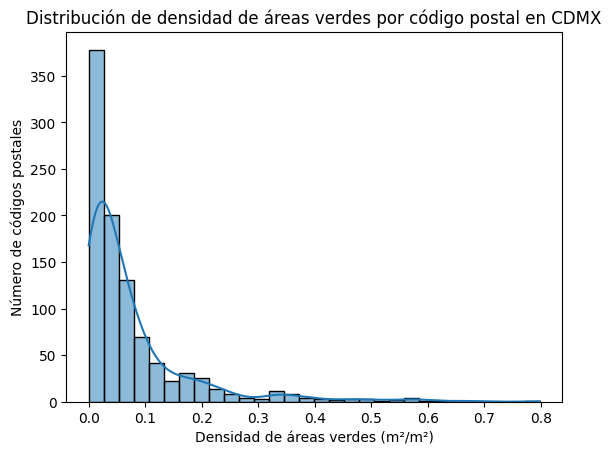

In [14]:
#Histograma de densidad de áreas verde por código postal
sns.histplot(codigos_postales_shp['densidad_verde'], bins=30, kde=True)
plt.xlabel('Densidad de áreas verdes (m²/m²)')
plt.ylabel('Número de códigos postales')
plt.title('Distribución de densidad de áreas verdes por código postal en CDMX')
plt.show()
